<a href="https://colab.research.google.com/github/19K41A04H5/AI/blob/main/Copy_of_ASSIGNMENT_4(4H5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import math as mt
import random
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/artificial.csv')
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [ ]:
outliers = []
def detect_outliers_zscore(data):
     thres = 2
     mean = np.mean(data)
     std = np.std(data)
     for i in data:
       z_score = (i-mean)/std
       if (np.abs(z_score))>thres:
        outliers.append(i)
       return outliers



In [ ]:
sample_outliers_X = detect_outliers_zscore(data['X'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in X coloumn from Z-score method: ", sample_outliers_X)
print("Outliers in Y coloumn from Z-score method: ", sample_outliers_Y)

Outliers in X coloumn from Z-score method:  []
Outliers in Y coloumn from Z-score method:  []


In [ ]:
from scipy.stats import zscore
z = np.abs(zscore(data['X']))
data['ZscoreX'] = z
outliers_A=len(data[data['ZscoreX']>2])
data_z = data[data['ZscoreX']<2]
data=data_z.drop(['ZscoreX'], axis=1)
data



,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [ ]:
print(data.isnull().sum())

X    0
Y    0
dtype: int64


In [ ]:
m1 = data['X'].mean()
m2 = data['Y'].mean()
data['X'].fillna(value=m1, inplace=True)
data['Y'].fillna(value=m2, inplace=True)
data


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [ ]:
from sklearn.model_selection import train_test_split
dataframe = data.values
X, Y = dataframe[:,:-1], dataframe[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 10)
x_train

array([[7.5],
       [7.9],
       [7.8],
       [7.7],
       [7.3],
       [7.1],
       [7.6],
       [7.3],
       [7.9],
       [7.3],
       [7. ],
       [7.1],
       [8.2],
       [7.4],
       [6.7],
       [8.1],
       [8.1],
       [8.5],
       [7.3],
       [7.1],
       [7.3],
       [8.5],
       [8.4],
       [7.1],
       [7.6],
       [8. ],
       [7.4],
       [7.8],
       [7.5]])

In [ ]:
m1=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.01
max_iter=10000

In [ ]:
def gradient(m1,c,X,Y):
  m1_deriv=-1*(Y-m1*X)*X
  c_deriv=-1*(Y-m1*X-c)
  return m1_deriv,c_deriv

In [ ]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m1,del_c=gradient(m1, c, x_train[sample,0], y_train[sample])
    m1=m1-eta*del_m1
    c=c-eta*del_c
print('model parameter m and c',m1,c)

model parameter m and c 22.48052725676742 2.504612421804788


In [ ]:
y_pred_train = []
for sample in range(x_train.shape[0]):
  X=x_train[sample,0]
  Y=y_train[sample]
  y_p_tr = (m1 * X) + c 
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)


In [ ]:
y_pred_test = []
for sample in range(x_test.shape[0]):
  x1=x_test[sample,0]
  y=y_test[sample]
  y_p_te = (m1 * x1) + c 
  y_pred_test.append(y_p_te)
y_pred_test = np.array(y_pred_test)

In [ ]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 72.02966340718413
Mean square error 5188.272410552241
Mean absolute error 57.195396509151955


In [ ]:
#Testing Accuracies
mse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 24.481020582787107
Mean square error 599.320368774846
Mean absolute error 21.428309786618577


In [ ]:
X1=input('enter X1 value')
print('X1=',X1)
Y=m1*float(X1)+c
print('Y=',Y)


enter X1 value9.5
X1= 9.5
Y= 216.06962136109527


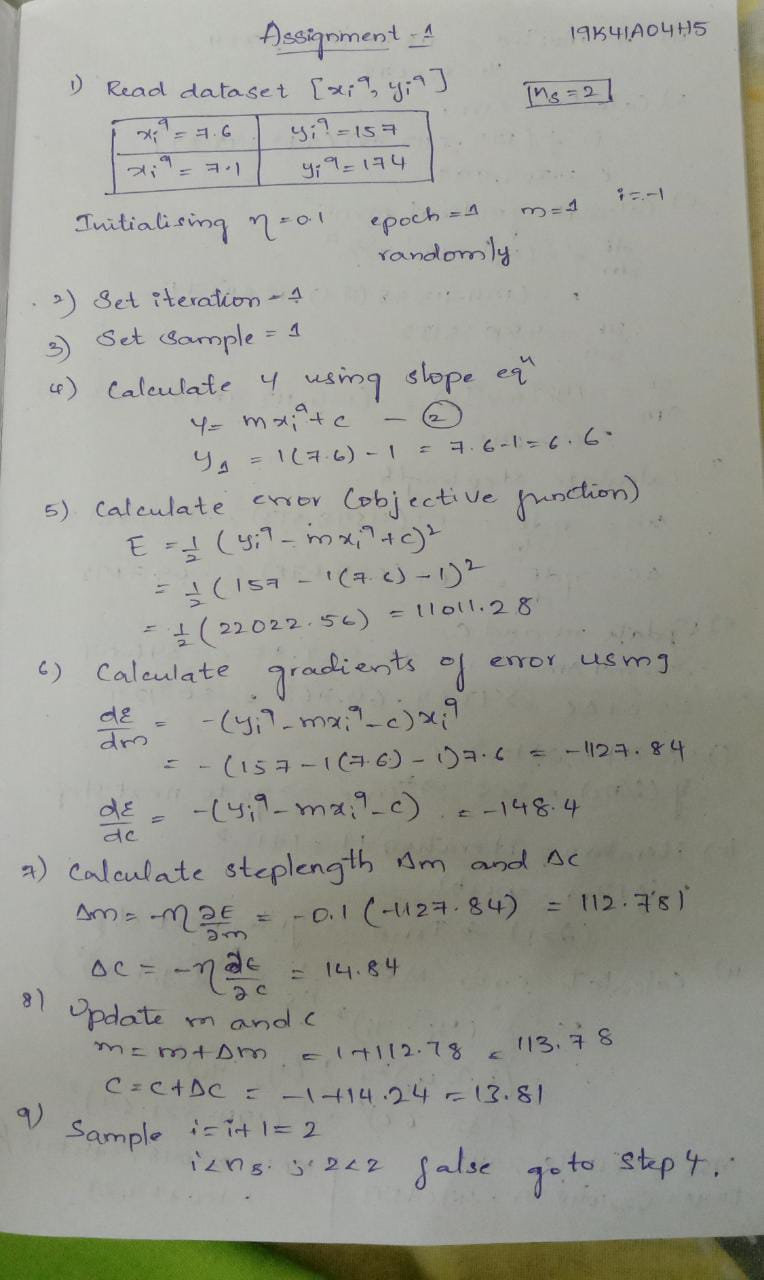

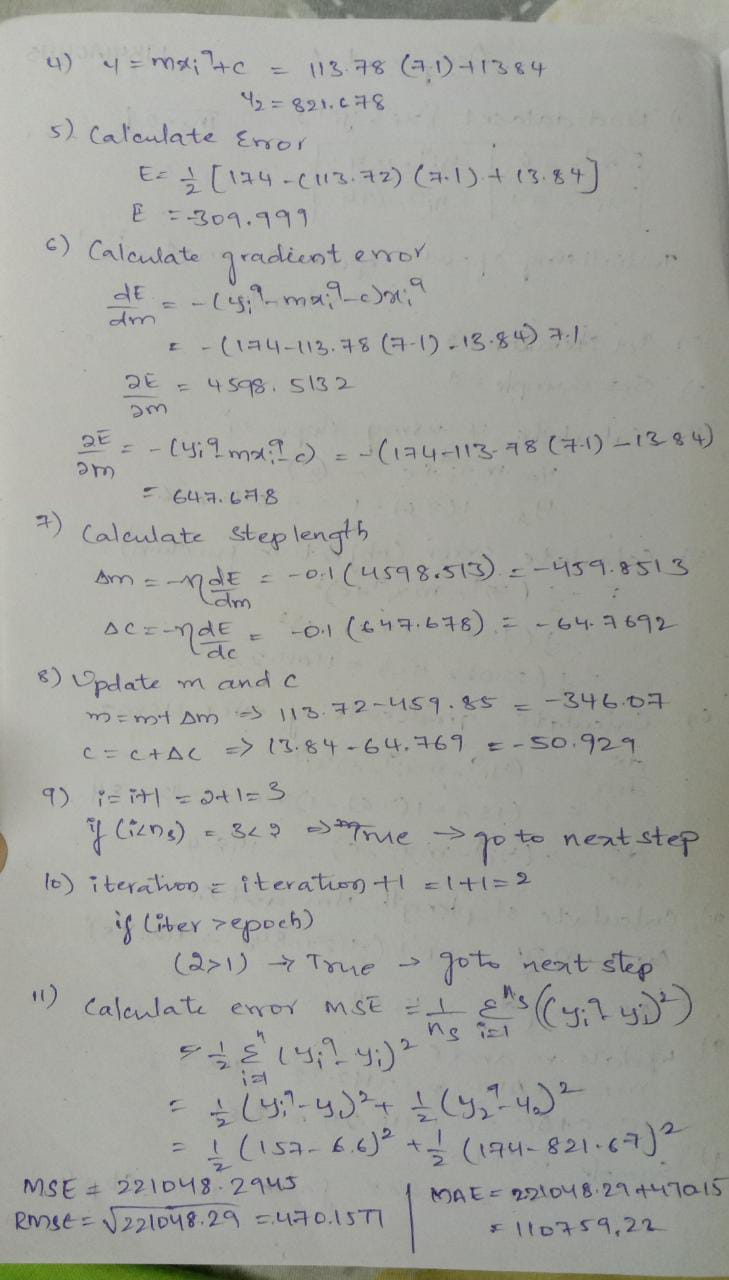